In [1]:
from fem import fe_solver_2D, neoHookean_const_model, plotmesh
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

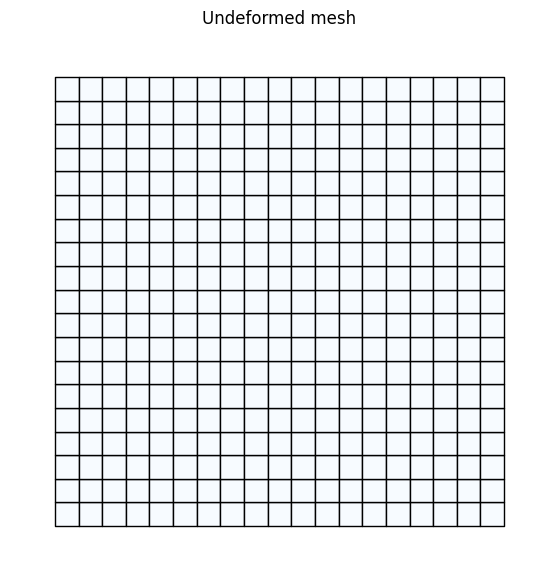

In [2]:
#Generate nodes and elements
nrow = 20
ncol = 20
n_node = nrow*ncol
n_elem = n_node-nrow-ncol+1
node_X, node_Y = np.meshgrid(np.linspace(0,1,nrow),np.linspace(0,1,ncol))
node_X = np.vstack((node_Y.flatten(), node_X.flatten())).T

elements = np.zeros((n_elem, 4), dtype=np.int_)

i=0
j=0
while i < n_node - ncol: #exclude 1 row at the top because there are no nodes above those to form elements.
    if (i+1)%ncol != 0: #Skip the nodes on the right
        elements[j,0] = i
        elements[j,3] = i+1
        elements[j,2] = i+ncol + 1
        elements[j,1] = i+ncol
        j+= 1
    i+= 1

# Plot to check
plotmesh(elements, node_X, c=np.ones([node_X.shape[0]]), title='Undeformed mesh', cbar = False); 

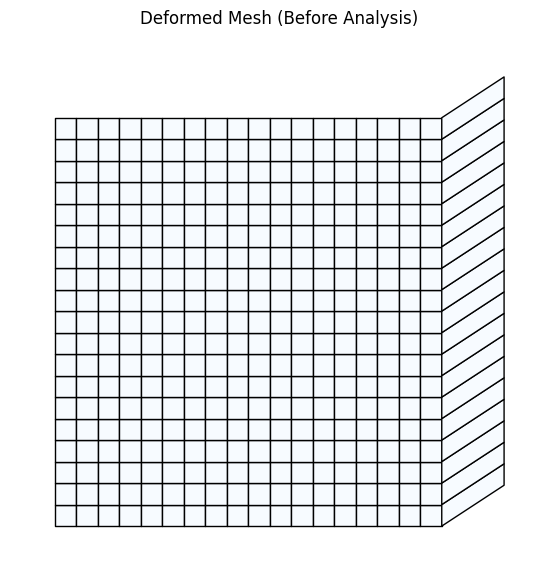

In [3]:
# create DOF map (In this case shearing)
node_x = np.zeros_like(node_X)
DOF_fmap = np.zeros((n_node,2),dtype=int)
DOF_imap = [] 
dof = 0
for i in range(n_node):
    X = node_X[i]
    node_x[i] = node_X[i]
    if X[0]<0.001:
        DOF_fmap[i,0] = -1
        node_x[i,0] = 0
        DOF_fmap[i,1] = -1
    elif X[0]>0.999:
        DOF_fmap[i,0] = -1
        node_x[i,0] = 1.1
        DOF_fmap[i,1] = -1
        node_x[i,1] = node_x[i,1] + 0.1
    else:
        DOF_fmap[i,0] = dof
        DOF_fmap[i,1] = dof+1
        dof+=2 
        DOF_imap.append([i,0])
        DOF_imap.append([i,1])
plotmesh(elements, node_x, c=np.ones([node_X.shape[0]]), title='Deformed Mesh (Before Analysis)', cbar = False); 

In [4]:
const_model = neoHookean_const_model(c1 = 1.0)
mysolver = fe_solver_2D(node_X, node_x, elements, DOF_fmap, const_model)
mysolver.n_print = 1
mysolver.itermax = 20
node_x, F, sigma = mysolver.solve()

Solving...
iter 1,   residual = 4.511215004063499
iter 2,   residual = 6.919438804200166
iter 3,   residual = 3.91620040755272
iter 4,   residual = 2.1961338791168847
iter 5,   residual = 1.1934665425470605
iter 6,   residual = 0.6070192784332429
iter 7,   residual = 0.3008961625543855
iter 8,   residual = 0.15998236574916605
iter 9,   residual = 0.08480957963368801
iter 10,   residual = 0.03895156199850328
iter 11,   residual = 0.01530196879235742
iter 12,   residual = 0.00596766706007131
iter 13,   residual = 0.0024359810803516397
iter 14,   residual = 0.001026941723398883
iter 15,   residual = 0.0004418979254545892
iter 16,   residual = 0.00019292797607742146
iter 17,   residual = 8.517986960700635e-05
iter 18,   residual = 3.795439277725786e-05
iter 19,   residual = 1.7044386470892975e-05
iter 20,   residual = 7.70700960663376e-06
Solution converged!


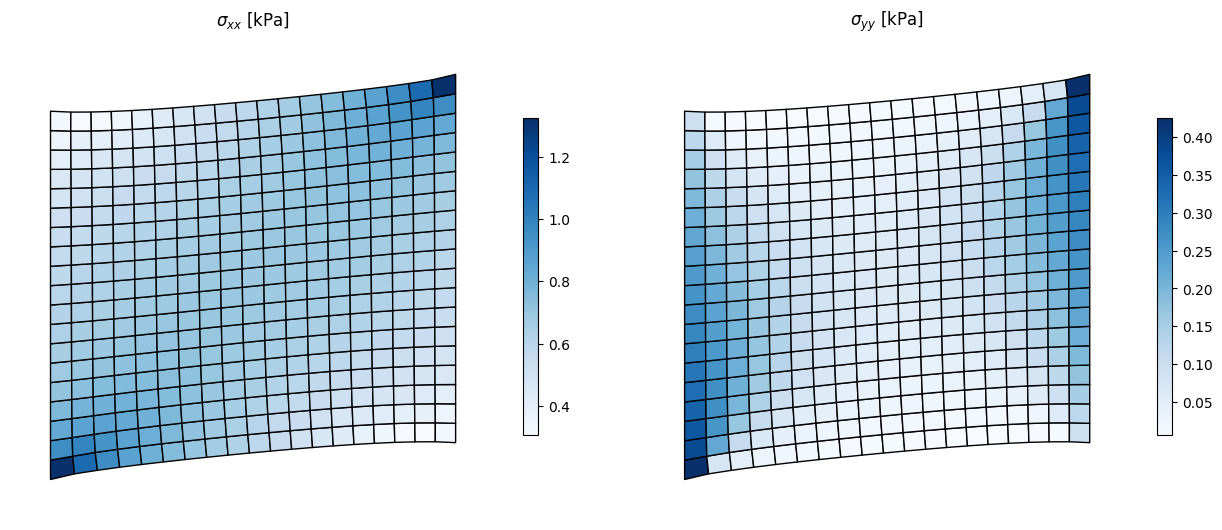

In [5]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
plotmesh(elements, node_x, sigma[:,0,0], title='$\sigma_{xx}$ [kPa]', ax=axes[0]); 
plotmesh(elements, node_x, sigma[:,1,1], title='$\sigma_{yy}$ [kPa]', ax=axes[1]); 